In [21]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "nvidia-corporation-nvda-stock-2020-to-2024"

# **Import**

In [22]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(zoo)

# **1. Data Import & Structure**

In [23]:
data <- read.csv('/kaggle/input/nvidia-corporation-nvda-stock-2020-to-2024/nvda_stock_data.csv')

* **Date: The date of the stock data.**
* **Open: The opening price of NVIDIA stock on the given date.**
* **High: The highest price of NVIDIA stock during the trading day.**
* **Low: The lowest price of NVIDIA stock during the trading day.**
* **Close: The closing price of NVIDIA stock on the given date.**
* **Adj Close: The adjusted closing price of NVIDIA stock, accounting for any corporate actions such as dividends or stock splits.**
* **Volume: The trading volume of NVIDIA stock on the given date.**

In [24]:
str(data)

'data.frame':	1092 obs. of  7 variables:
 $ Date     : chr  "2020-01-02" "2020-01-03" "2020-01-06" "2020-01-07" ...
 $ Open     : num  59.7 58.8 58.1 59.5 59.9 ...
 $ High     : num  60 59.5 59.3 60.4 60.5 ...
 $ Low      : num  59.2 58.5 57.8 59.1 59.5 ...
 $ Close    : num  60 59 59.3 60 60.1 ...
 $ Adj.Close: num  59.7 58.8 59 59.7 59.9 ...
 $ Volume   : int  23753600 20538400 26263600 31485600 27710800 25511200 31629600 31984000 35908800 26310400 ...


In [25]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date*,1,1092,5.465000e+02,3.153776e+02,5.465000e+02,5.465000e+02,4.047498e+02,1.000000e+00,1092.00,1.091000e+03,0.000000,-1.203297,9.543759e+00
Open,2,1092,2.543350e+02,1.907896e+02,1.876000e+02,2.211132e+02,9.298496e+01,5.002500e+01,958.51,9.084850e+02,1.774178,2.920067,5.773557e+00
High,3,1092,2.591011e+02,1.941010e+02,1.919000e+02,2.253254e+02,9.659880e+01,5.248500e+01,974.00,9.215150e+02,1.779911,2.954230,5.873762e+00
Low,4,1092,2.493567e+02,1.869022e+02,1.838850e+02,2.168251e+02,9.242899e+01,4.517000e+01,935.10,8.899300e+02,1.761139,2.848207,5.655919e+00
Close,5,1092,2.544821e+02,1.906122e+02,1.879950e+02,2.212718e+02,9.369847e+01,4.910000e+01,950.02,9.009200e+02,1.768479,2.887869,5.768186e+00
Adj.Close,6,1092,2.542704e+02,1.906851e+02,1.877592e+02,2.210406e+02,9.351901e+01,4.893583e+01,950.02,9.010842e+02,1.768527,2.887161,5.770393e+00
Volume,7,1092,4.682122e+07,1.869374e+07,4.470295e+07,4.534300e+07,1.676368e+07,9.788400e+06,154391100.00,1.446027e+08,1.063296,2.385300,5.656984e+05


In [26]:
summary(data)

     Date                Open             High             Low        
 Length:1092        Min.   : 50.02   Min.   : 52.48   Min.   : 45.17  
 Class :character   1st Qu.:132.95   1st Qu.:134.93   1st Qu.:130.64  
 Mode  :character   Median :187.60   Median :191.90   Median :183.88  
                    Mean   :254.34   Mean   :259.10   Mean   :249.36  
                    3rd Qu.:297.56   3rd Qu.:304.60   3rd Qu.:288.08  
                    Max.   :958.51   Max.   :974.00   Max.   :935.10  
     Close         Adj.Close          Volume         
 Min.   : 49.1   Min.   : 48.94   Min.   :  9788400  
 1st Qu.:133.0   1st Qu.:132.74   1st Qu.: 34312150  
 Median :188.0   Median :187.76   Median : 44702950  
 Mean   :254.5   Mean   :254.27   Mean   : 46821217  
 3rd Qu.:296.0   3rd Qu.:295.57   3rd Qu.: 56924400  
 Max.   :950.0   Max.   :950.02   Max.   :154391100  

**Check missing value**

In [27]:
sum(is.na(data))

[1] 0

**duplicate check**

In [28]:
sum(duplicated(data))

[1] 0

# **2. Data Transform**

In [29]:
data$Date <- as.Date(data$Date)

In [30]:
names(data) <- c('Date','Open','High','Low','Close','Adj','Volume')

**Date Check**

In [31]:
head(data)

,Date,Open,High,Low,Close,Adj,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2020-01-02,59.6875,59.9775,59.1800,59.9775,59.74125,23753600
2,2020-01-03,58.7750,59.4575,58.5250,59.0175,58.78502,20538400
3,2020-01-06,58.0800,59.3175,57.8175,59.2650,59.03155,26263600
4,2020-01-07,59.5500,60.4425,59.0975,59.9825,59.74622,31485600
5,2020-01-08,59.9400,60.5100,59.5375,60.0950,59.85828,27710800
6,2020-01-09,60.9625,61.4825,60.2150,60.7550,60.51568,25511200


# **3. Data Visualization**

In [32]:
p1 <- ggplot(data, aes(x= Open)) + 
    geom_histogram(fill = 'skyblue',binwidth = 30, col = 'white') + 
    theme_bw() +
    ggtitle('Open Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <-ggplot(data, aes(x= High)) + geom_histogram(fill = 'blue',binwidth = 30 , col = 'white') + 
    theme_bw() +
    ggtitle('High Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <-ggplot(data, aes(x= Low)) + geom_histogram(fill = 'orange',binwidth = 30, col = 'white') +
    theme_bw() +
    ggtitle('Low Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <-ggplot(data, aes(x= Close)) + geom_histogram(fill = 'green',binwidth = 30, col = 'white' ) + 
    theme_bw() +
    ggtitle('Close Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <-ggplot(data, aes(x= Adj)) + geom_histogram(fill = 'yellow', binwidth = 30, col = 'white') + 
    theme_bw() +
    ggtitle('Adj Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <-ggplot(data, aes(x= Volume)) + geom_histogram(fill = 'red', col = 'white') + 
    theme_bw() +
    ggtitle('Volume Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


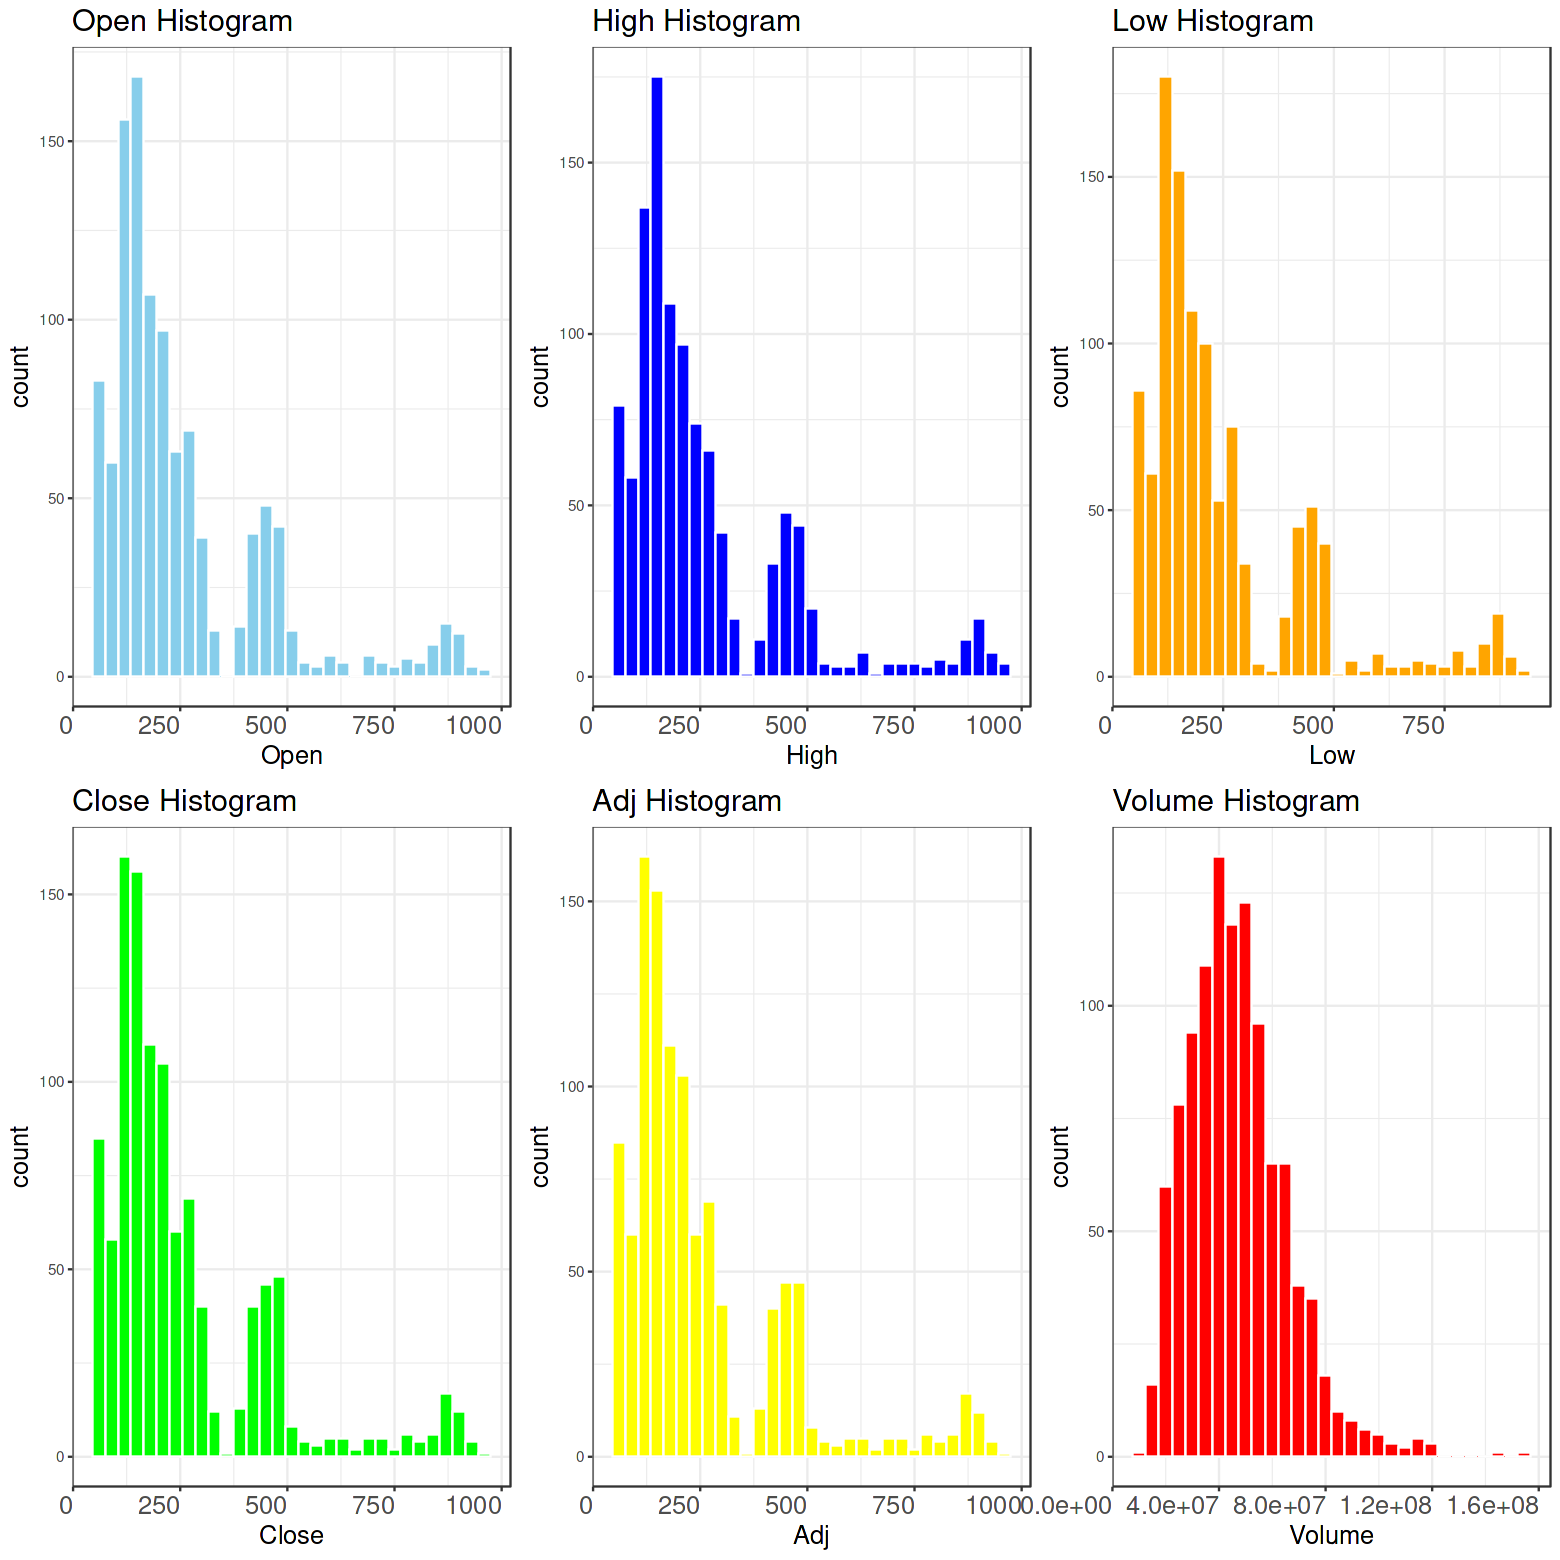

In [33]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

--------

**The amount of change over time**

In [34]:
p1 <- ggplot(data, aes(x=Date, y= Open)) + geom_line(color = 'skyblue' ) + ggtitle('Change in \'Open\' by year') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(data, aes(x=Date, y= High)) + geom_line(color = 'blue') + ggtitle('Change in \'High\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(data, aes(x=Date, y= Low)) + geom_line(color = 'orange') + ggtitle('Change in \'Low\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(data, aes(x=Date, y= Close)) + geom_line(color = 'green') + ggtitle('Change in \'Close\' by year') + 
    theme_bw() +    
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <- ggplot(data, aes(x=Date, y= Adj)) + geom_line(color = 'yellow') + ggtitle('Change in \'Adj\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <- ggplot(data, aes(x=Date, y= Volume)) + geom_line(color = 'red') + ggtitle('Change in \'Volume\' by year') + 
    theme_bw() + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    ) +
    scale_y_log10() 

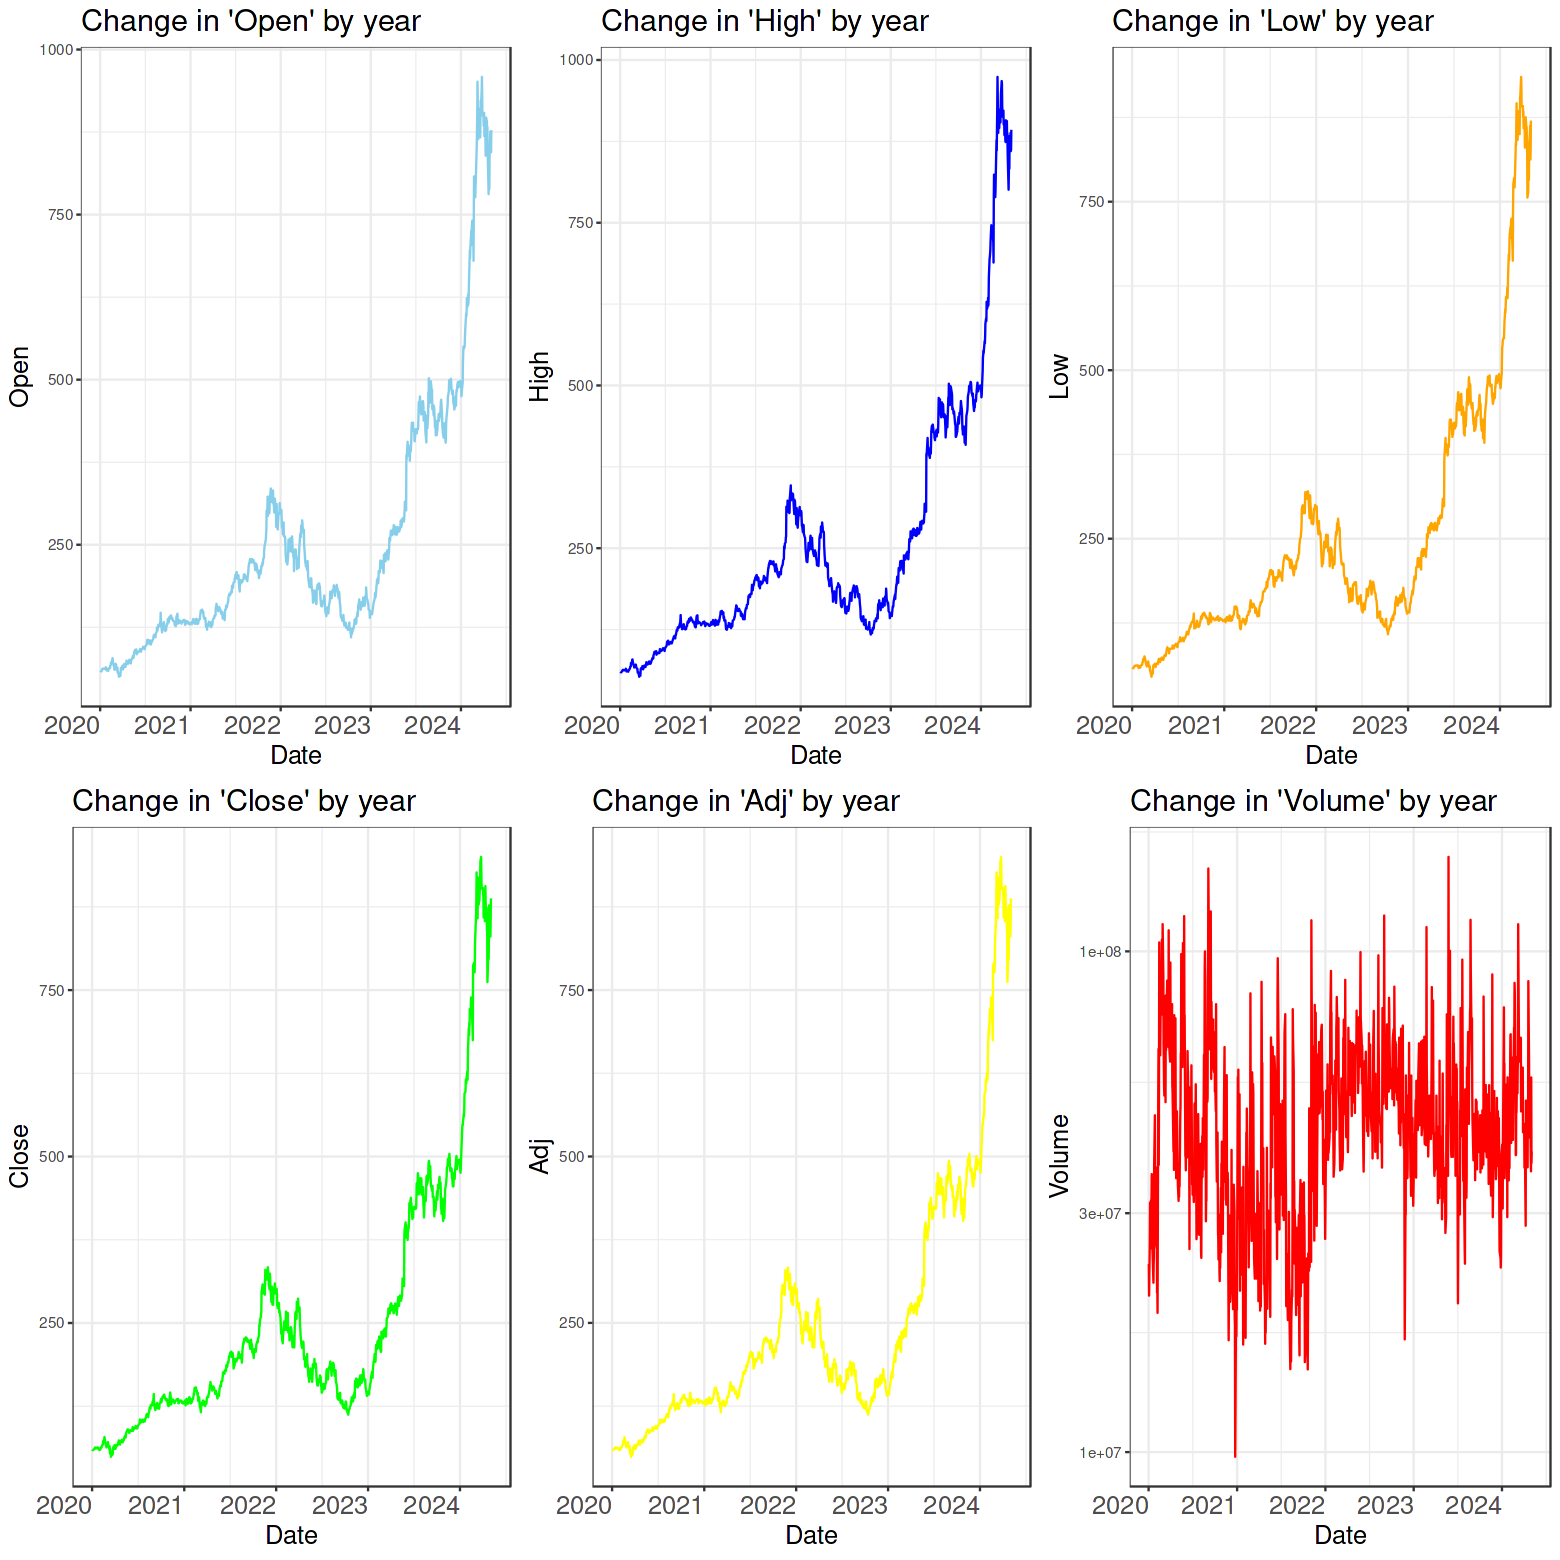

In [35]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

------

**Check the moving average(90 Days, 180Days, 300Days) of Close**

In [36]:
data2 <- data

In [37]:
temp <- zoo(data2$Close, data2$Date)

In [41]:
temp_rollmean90 <- zoo::rollmean(temp, 3 , fill = list(NA, NULL, NA))
temp_rollmean180 <- zoo::rollmean(temp, 6 , fill = list(NA, NULL, NA))
temp_rollmean300 <- zoo::rollmean(temp, 10 , fill = list(NA, NULL, NA))

In [43]:
data2$mean90_close <- coredata(temp_rollmean90)
data2$mean180_close <- coredata(temp_rollmean180)
data2$mean300_close <- coredata(temp_rollmean300)

In [44]:
p1 <- ggplot(data2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean90_close), color = 'red', size = 0.7) +
        ggtitle('Check the moving average(90 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(data2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean180_close), color = 'blue', size = 0.7) +
        ggtitle('Check the moving average(180 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p3 <- ggplot(data2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean300_close), color = 'orange', size = 0.7) +
        ggtitle('Check the moving average(300 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_line()`).”


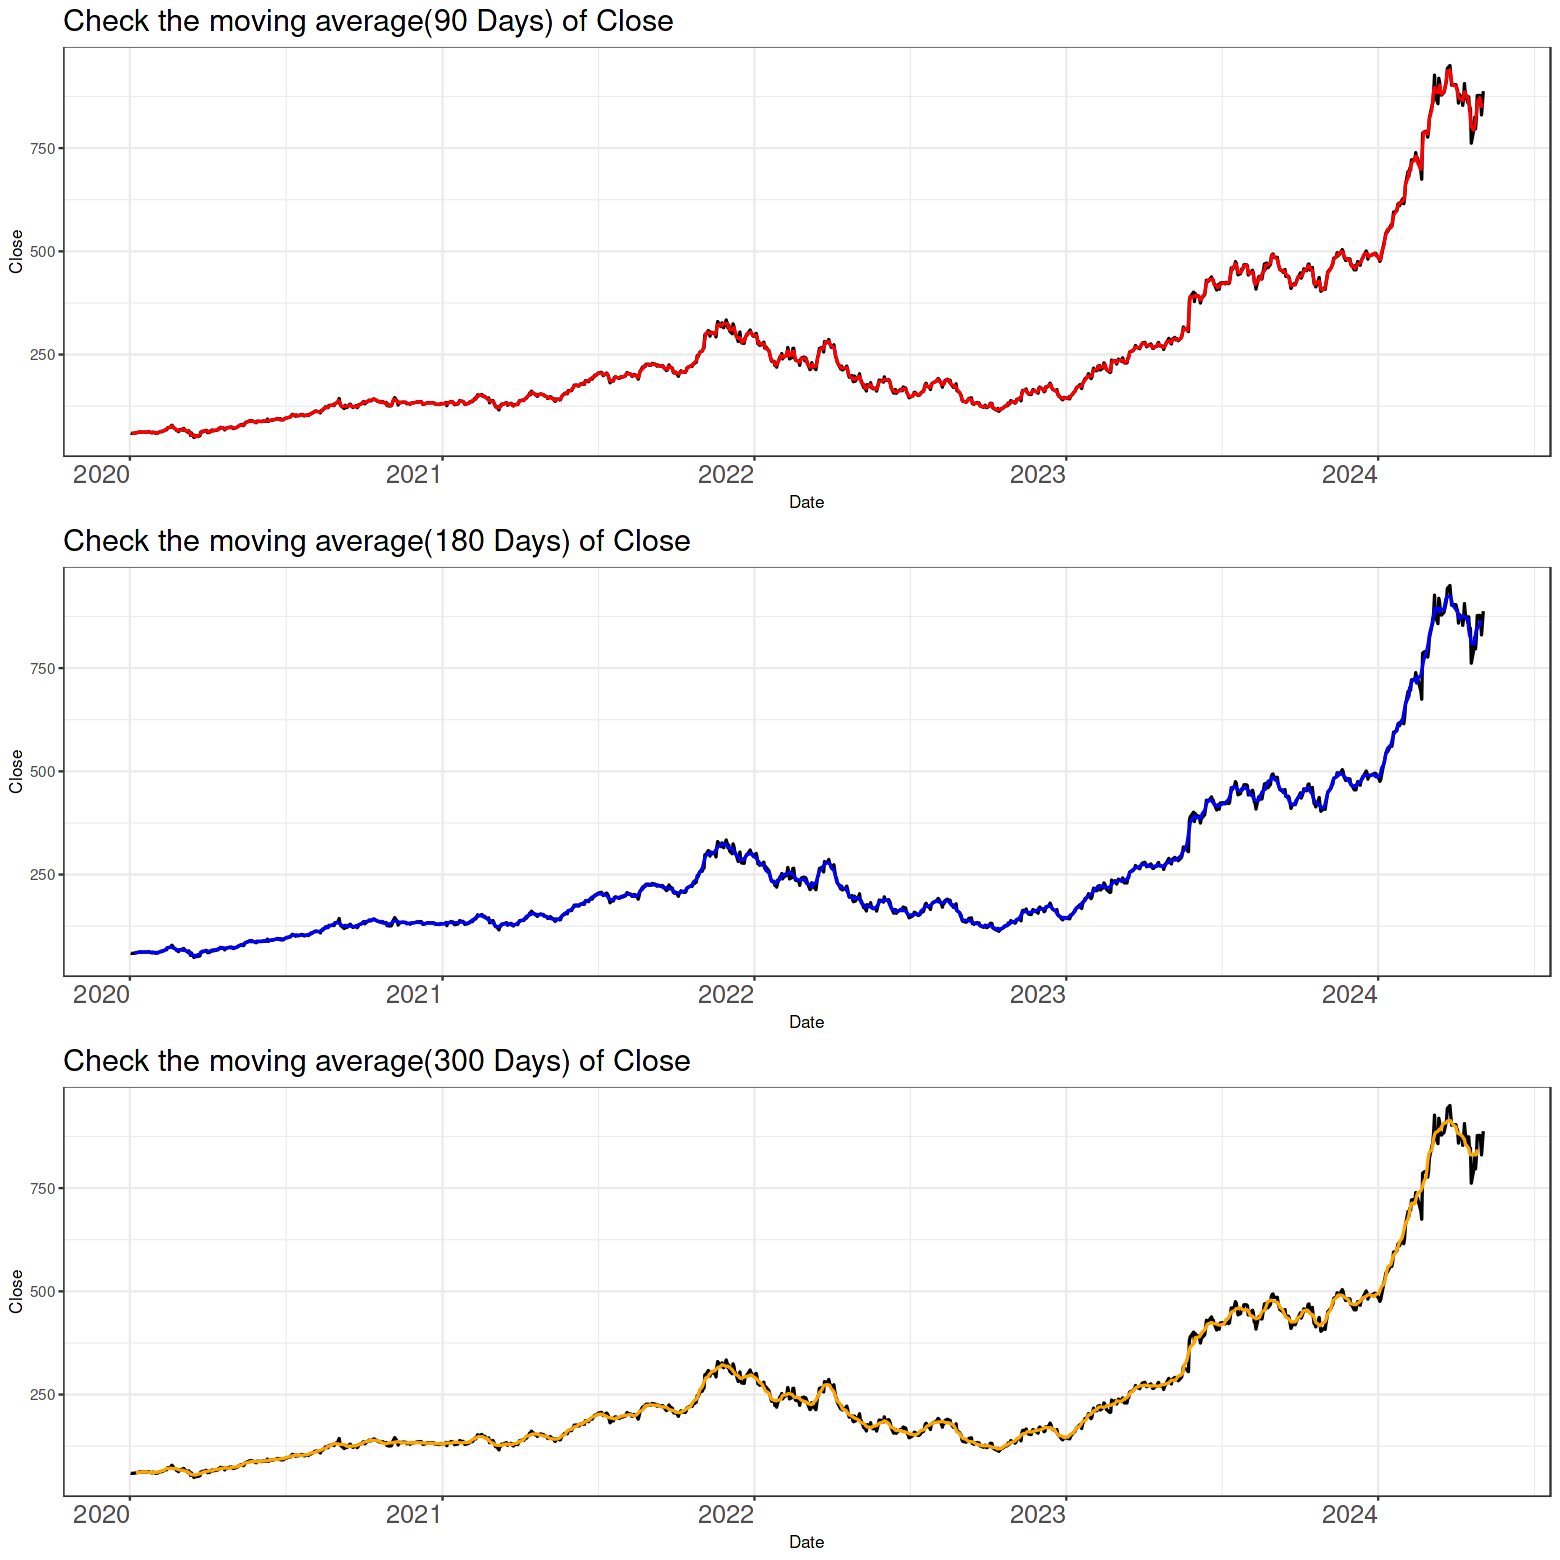

In [45]:
grid.arrange(p1,p2,p3, ncol = 1)

------

# **4. Modeling**

In [47]:
library(TTR)
library(forecast)

In [48]:
Close <- data[,'Close']

In [49]:
Close_ts <- ts(Close, frequency = 12, start = c(2020,1) , end = c(2024,5))

In [50]:
Close_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,59.9775,59.0175,59.2650,59.9825,60.0950,60.7550,61.0800,62.9950,61.8200,61.3925,62.2325,62.3200
2021,61.9850,62.5275,63.2150,62.6200,60.0500,61.9925,61.3850,61.4525,59.1075,60.0825,61.7825,62.6900
2022,63.5625,62.8975,65.7425,66.9725,68.1350,67.6950,72.4475,74.1425,78.6750,77.1750,73.5175,68.3200
2023,65.5125,66.9125,63.1500,67.5175,69.1075,66.4725,71.1275,68.3225,66.5100,61.3600,65.2700,61.6175
2024,54.0775,60.2100,49.1000,54.3175,50.7050,,,,,,,


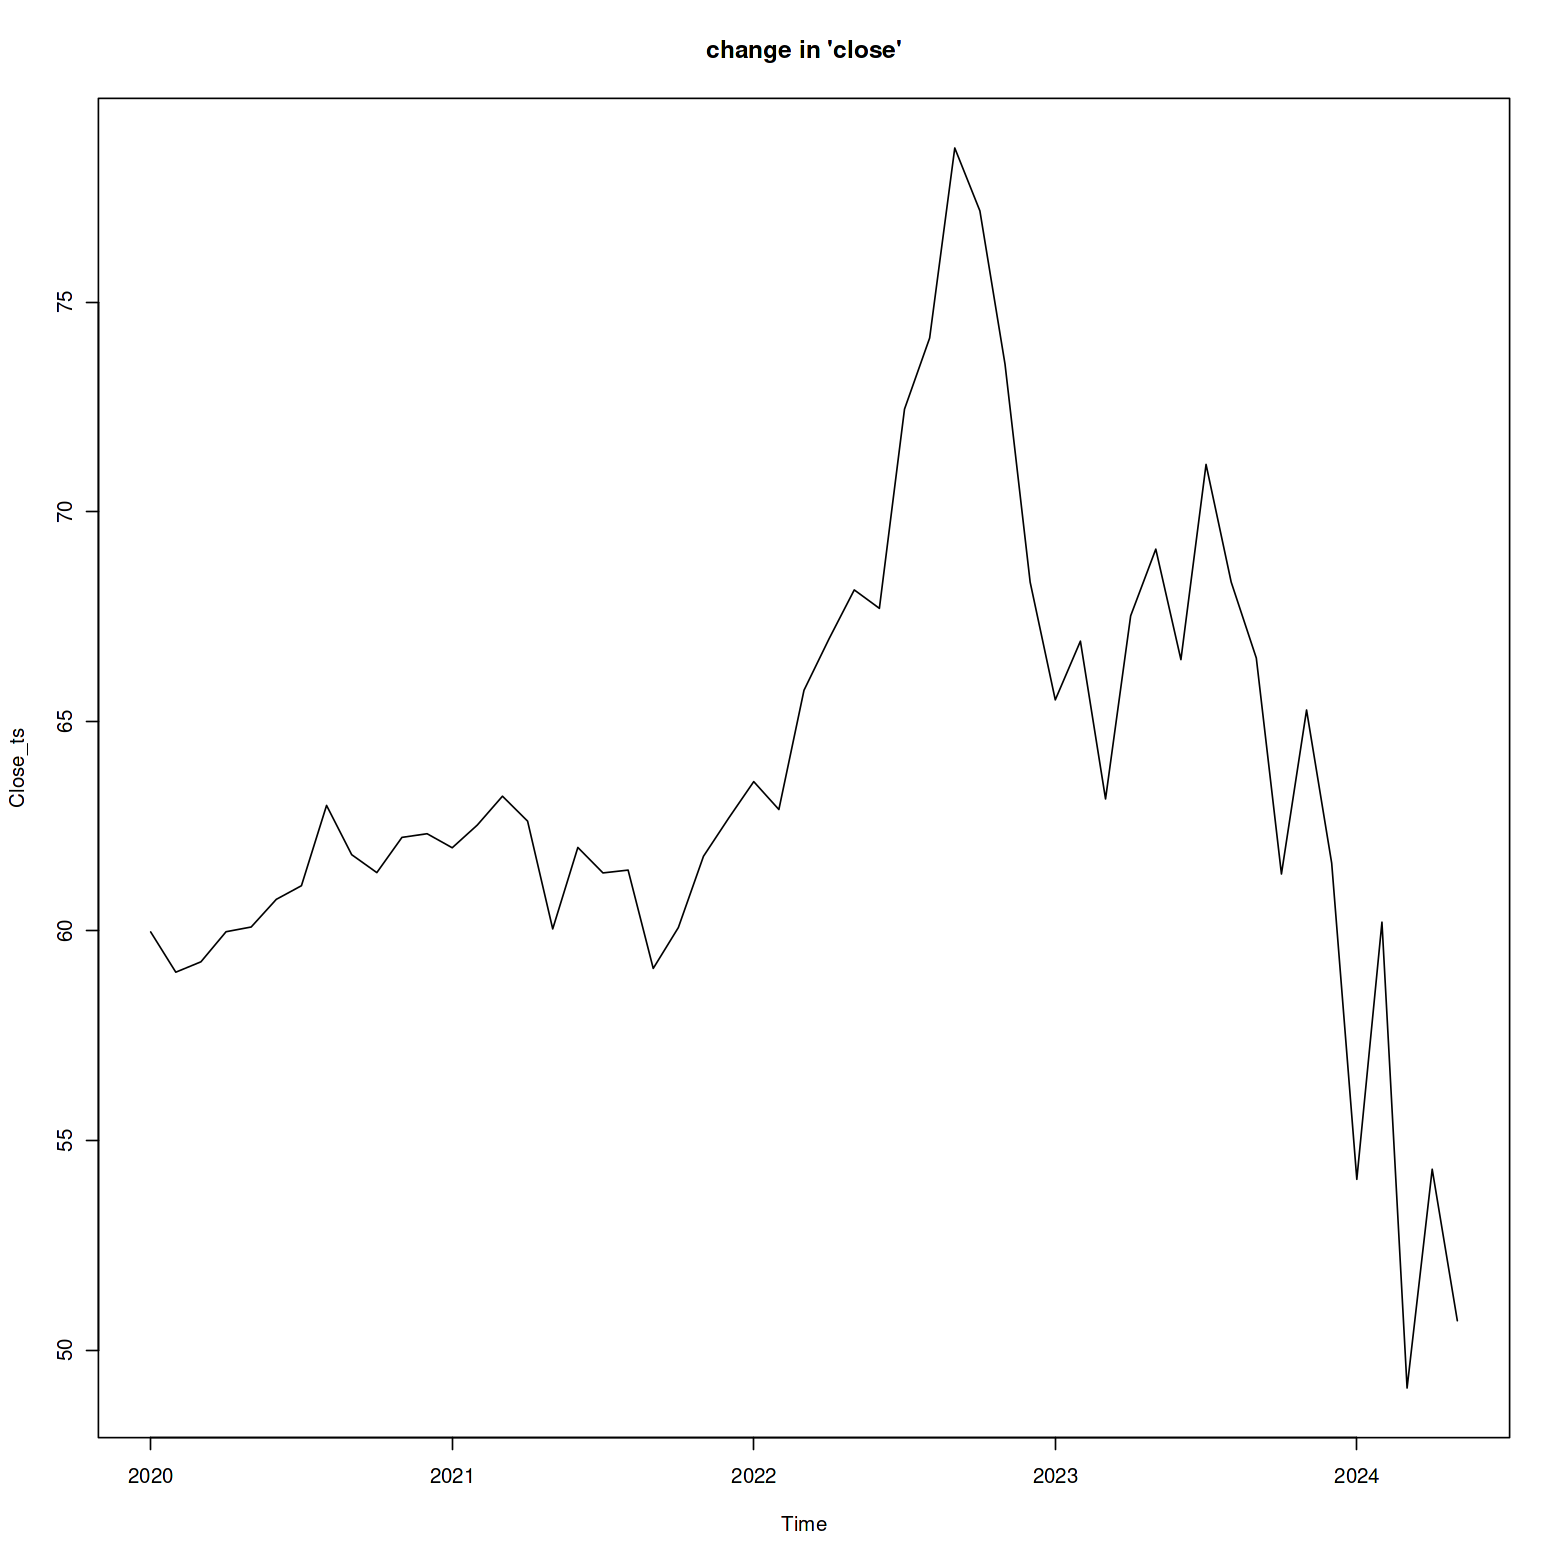

In [51]:
plot.ts(Close_ts, main = 'change in \'close\'')

In [75]:
Close_ts <- diff(Close_ts)

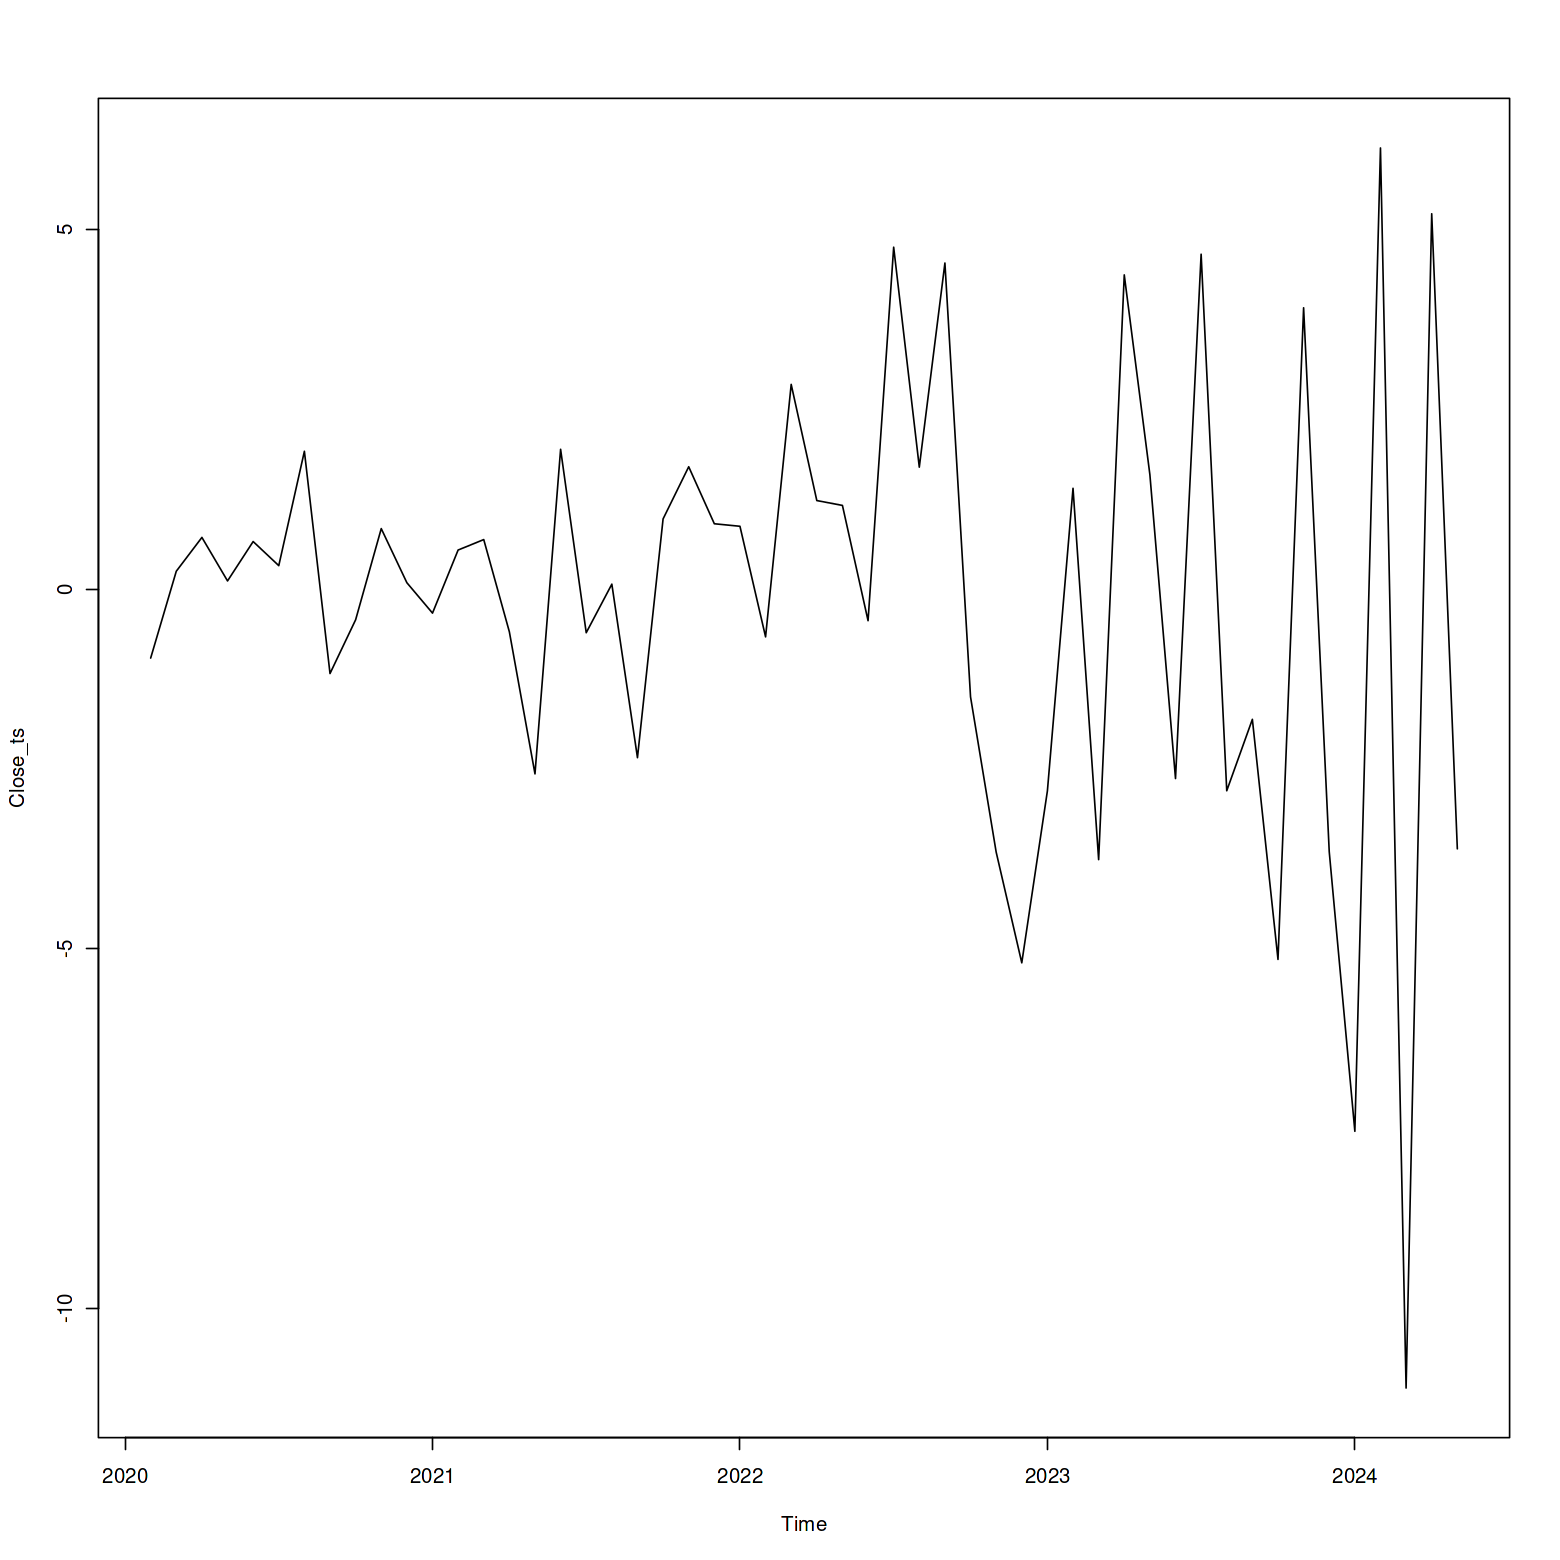

In [76]:
plot(Close_ts)

In [77]:
fit <- auto.arima(Close_ts)

In [78]:
fit

Series: Close_ts 
ARIMA(1,0,0) with zero mean 

Coefficients:
          ar1
      -0.3582
s.e.   0.1295

sigma^2 = 9.039:  log likelihood = -130.59
AIC=265.18   AICc=265.42   BIC=269.08

In [79]:
model <- arima(Close_ts, order = c(1,0,0))

In [80]:
model


Call:
arima(x = Close_ts, order = c(1, 0, 0))

Coefficients:
          ar1  intercept
      -0.3602    -0.1566
s.e.   0.1292     0.3044

sigma^2 estimated as 8.82:  log likelihood = -130.46,  aic = 266.92

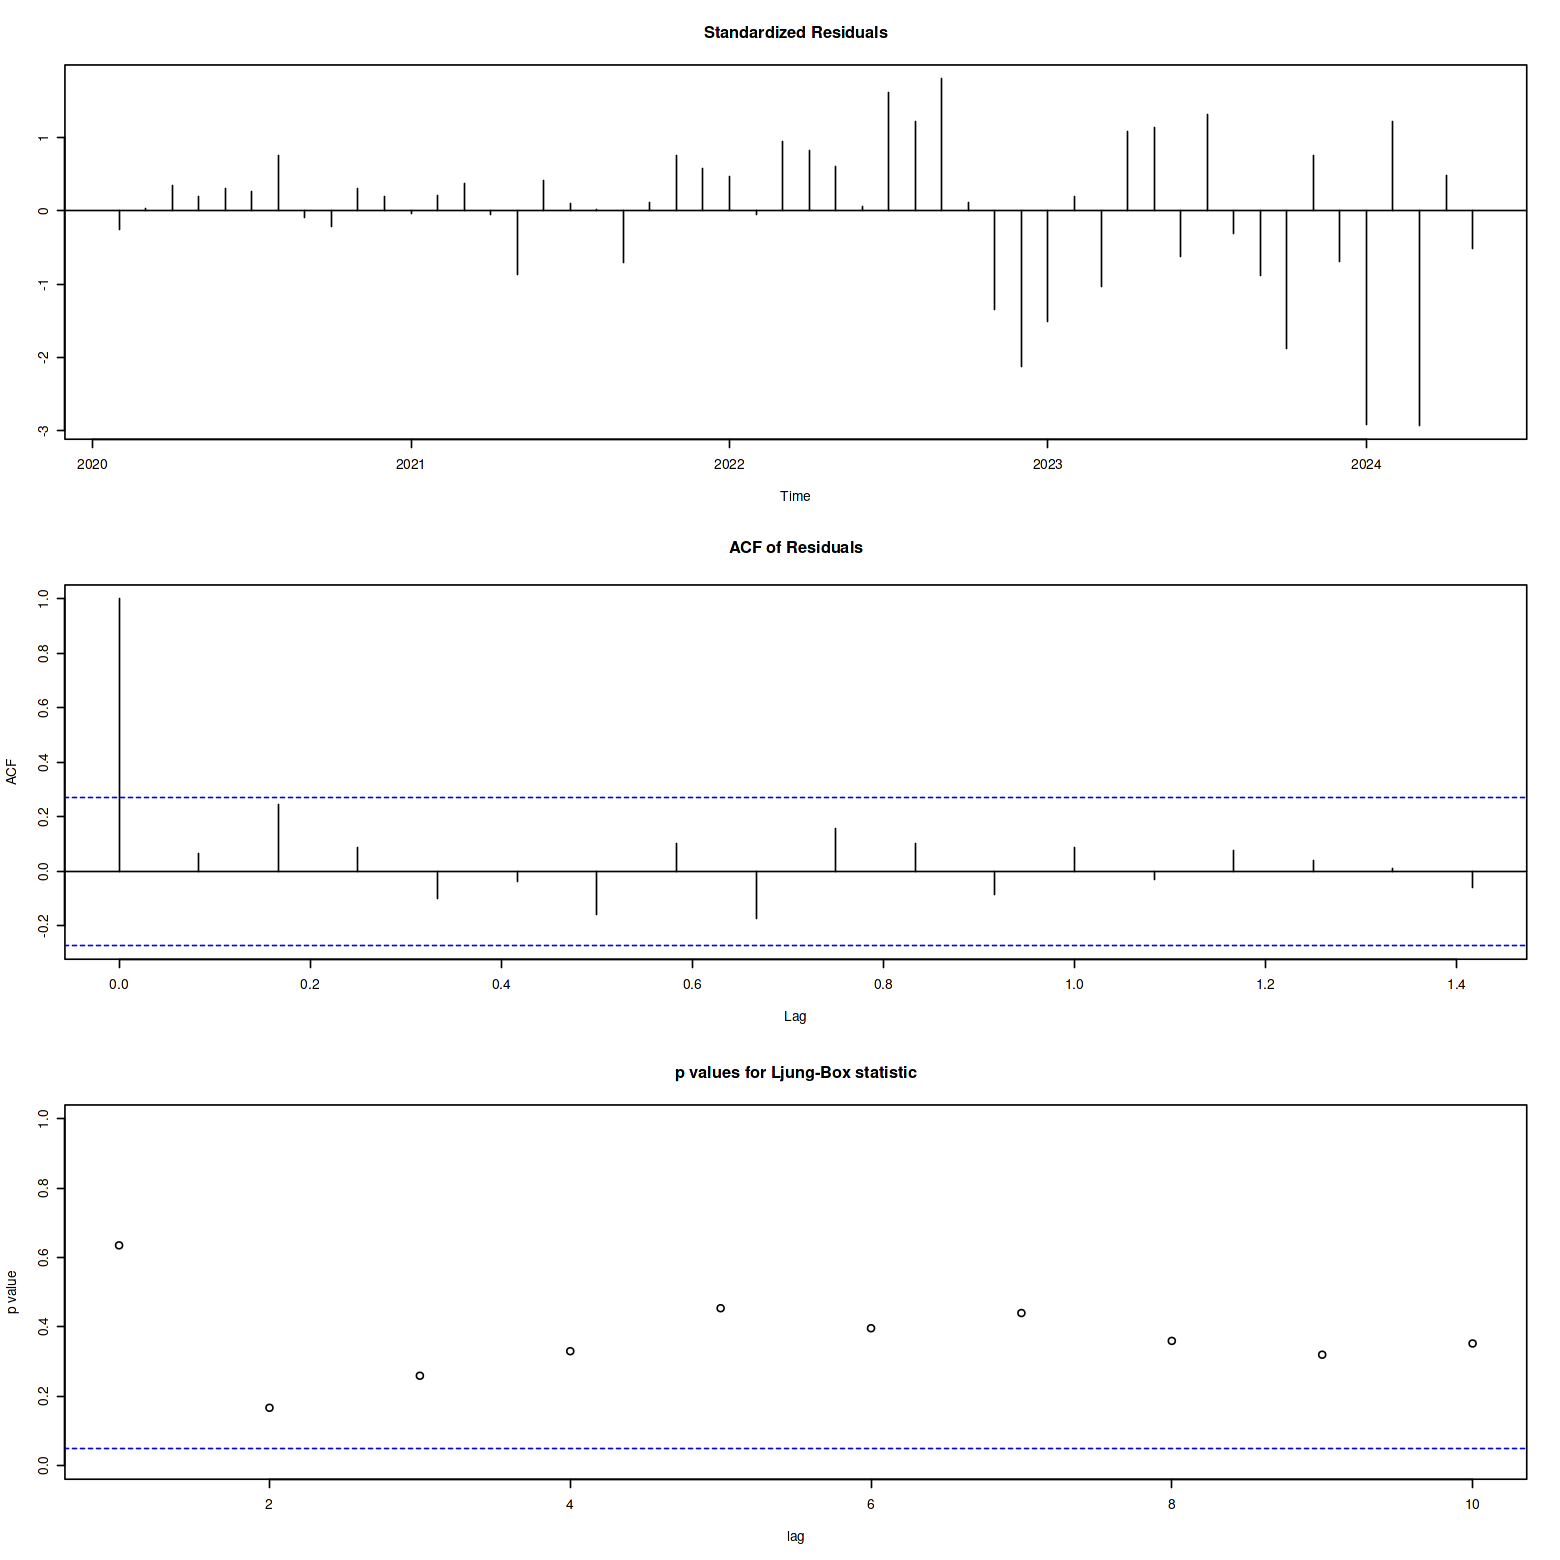

In [81]:
tsdiag(model)

In [82]:
# a six-month forecast
pred <- forecast(model,h= 6)

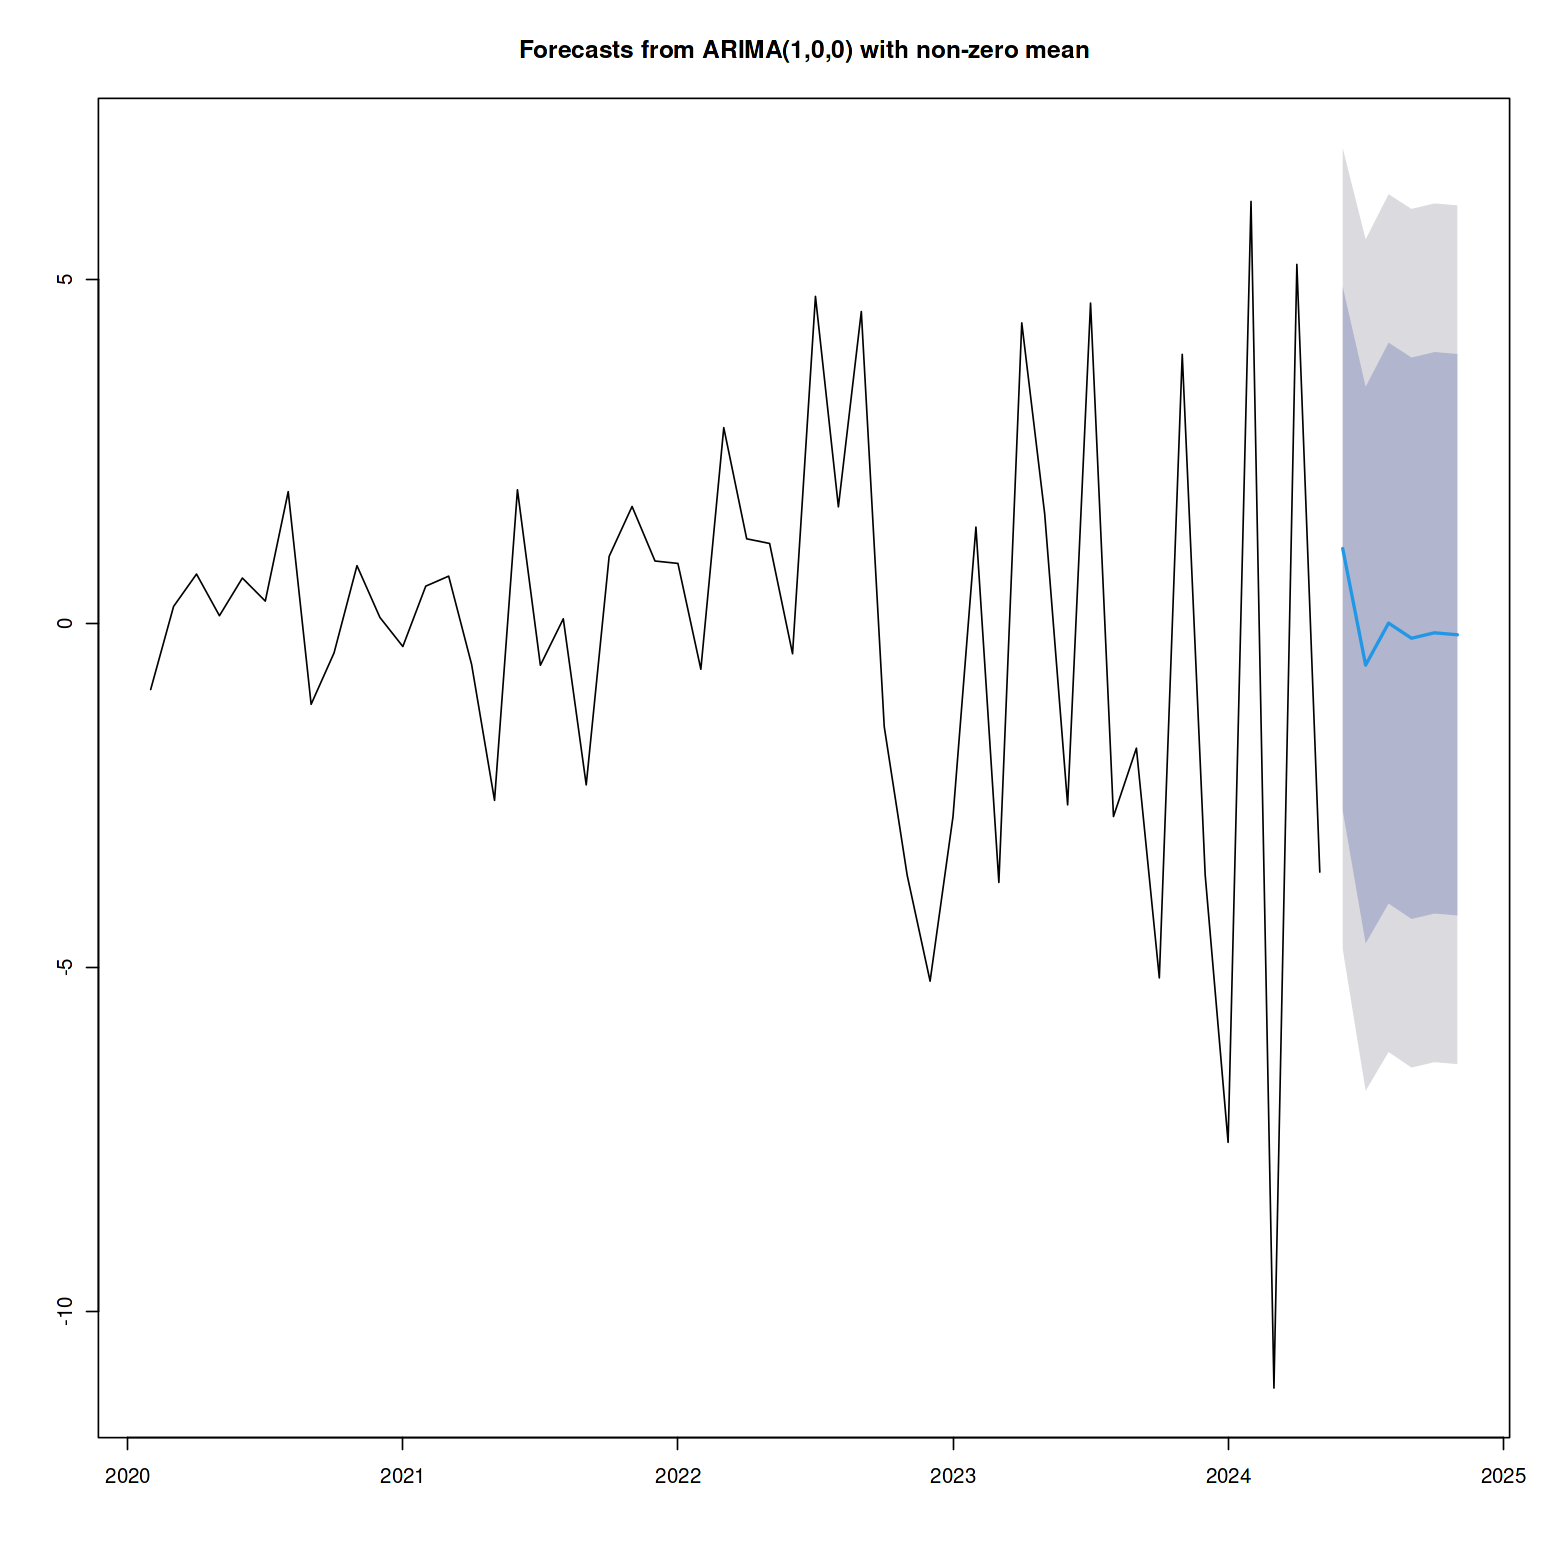

In [83]:
plot(pred)

In [84]:
#a one-year forecast
pred2 <- forecast(model,h= 12)

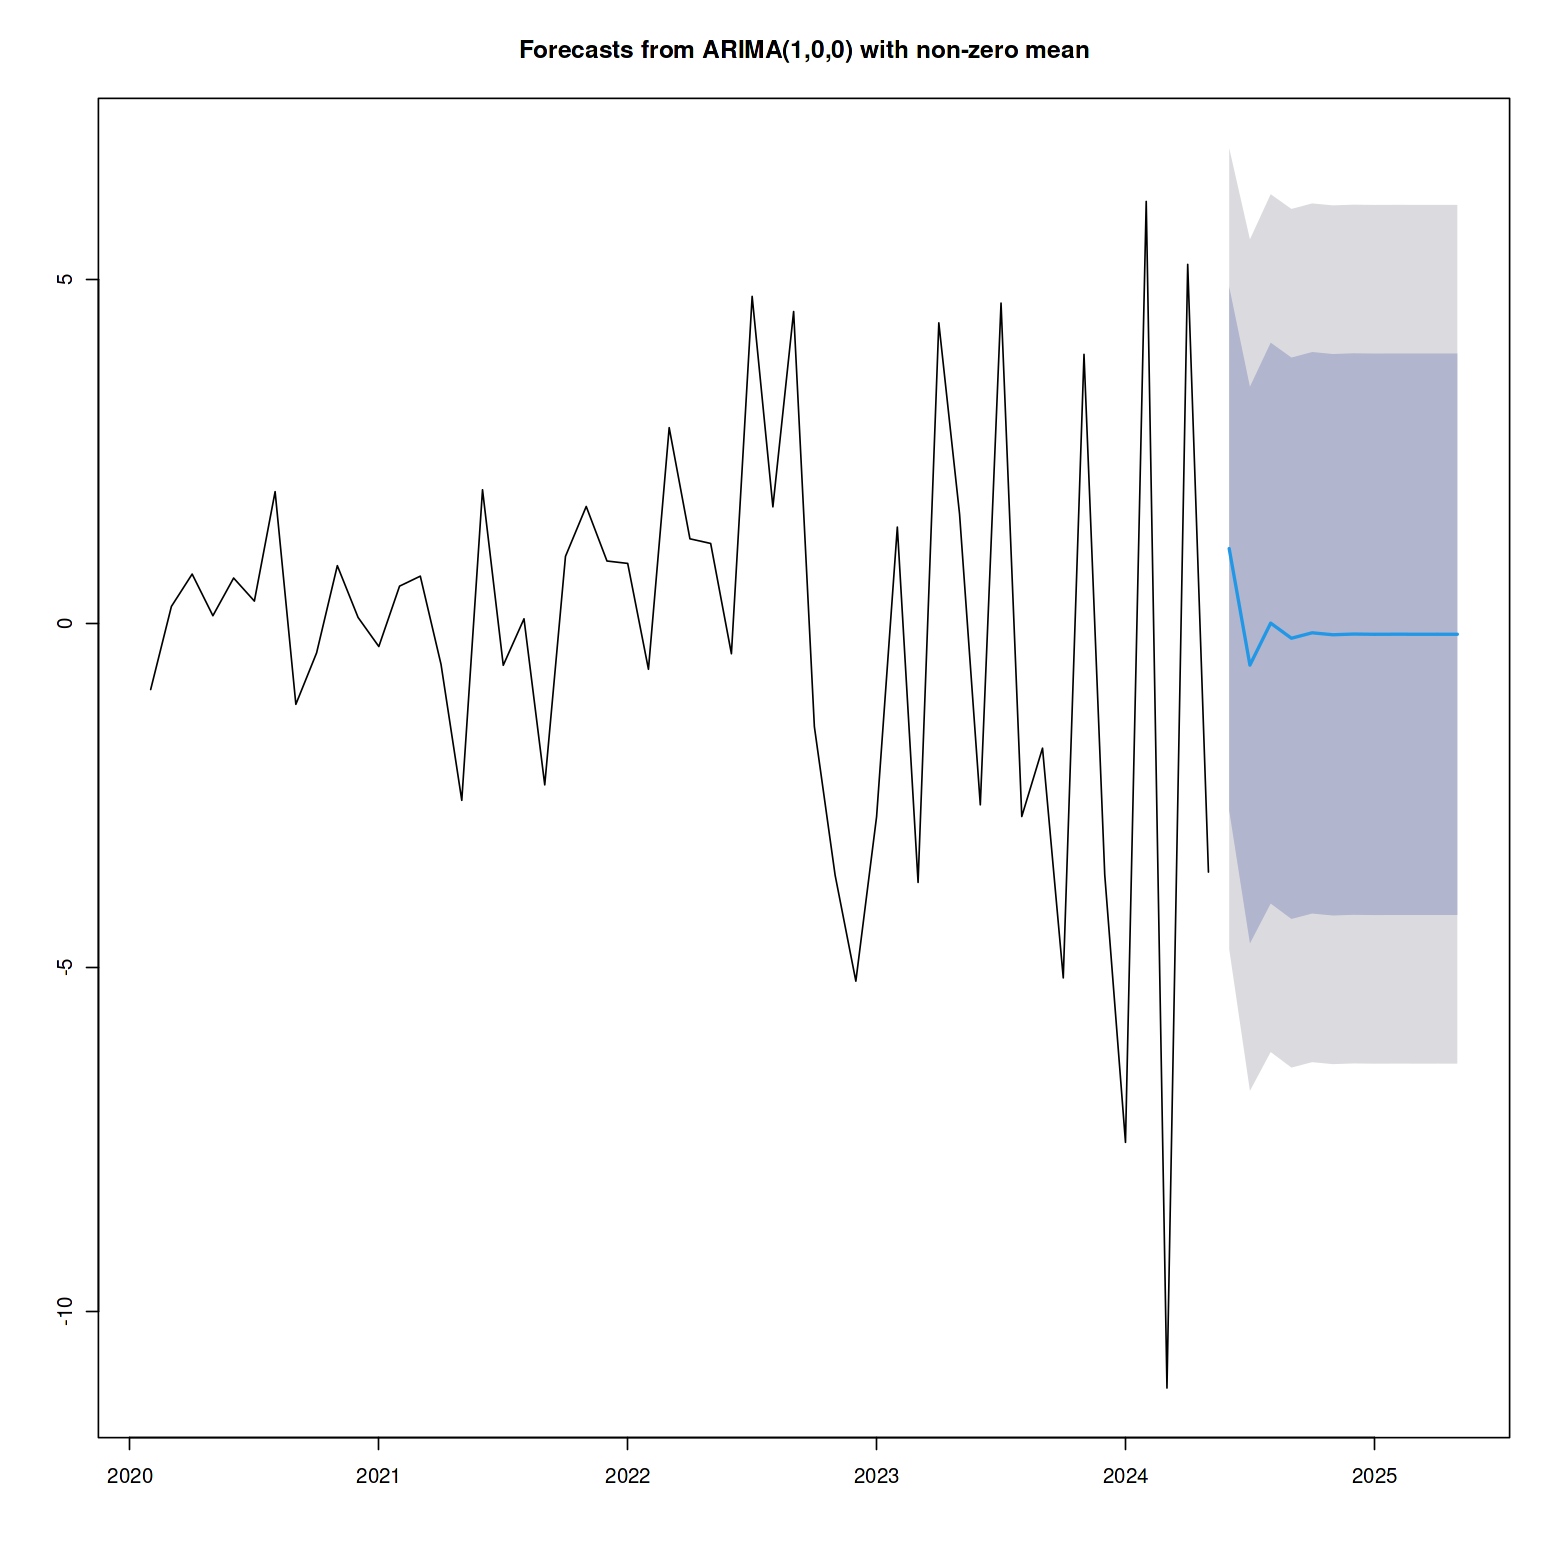

In [85]:
plot(pred2)

------------

**Please leave your advice in the comments. Thank you**